In [ ]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Circle, Patch
from scipy.special import expit
from scipy.stats import norm

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.constants import STYLE_PATH
from src.visualizations.figure_saver import NotebookFigureSaver

plt.style.use(STYLE_PATH)

FigureSaver = NotebookFigureSaver(chapter_id="08_concept_figures")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_dgp.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_dgp.pdf


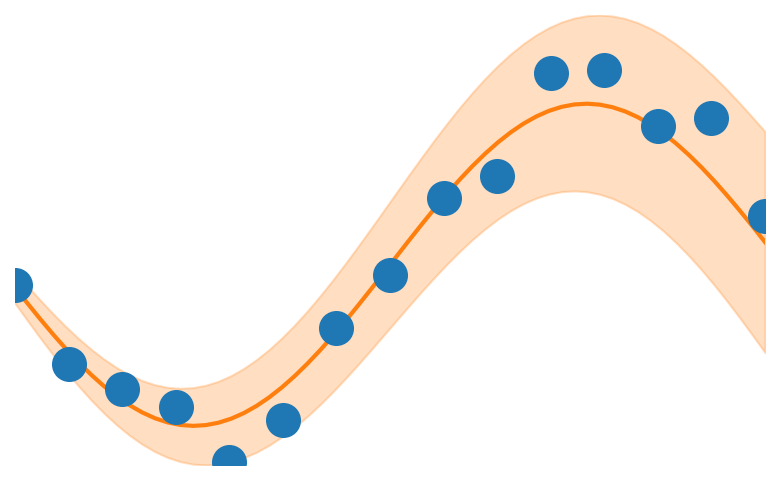

In [2]:
def plot_concept_dgp(n_points: int = 15, seed: int = 42):
    """
    Reproduce the top-left subplot of the multi-target figure:
    a sine function with modest heteroscedastic noise (increasing rightward),
    orange mean line + CI, blue points, and no axes.
    Returns the Matplotlib figure.
    """

    # Reproducibility
    rng = np.random.default_rng(seed)

    # Grid
    x = np.linspace(-3, 3, n_points)
    x_dense = np.linspace(-3, 3, 60)

    # True function
    f = np.sin(x)
    f_dense = np.sin(x_dense)

    # Simpler noise profile: linear ramp from 0.05 → 0.35
    base_noise = np.linspace(0.05, 0.35, n_points)
    base_noise_dense = np.linspace(0.05, 0.35, len(x_dense))

    # Observed points
    y = f + rng.normal(0, base_noise, size=n_points)

    # Predicted mean and CI
    y_pred_dense = f_dense
    y_lower_dense = y_pred_dense - 1.96 * base_noise_dense
    y_upper_dense = y_pred_dense + 1.96 * base_noise_dense

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(5, 3))

    ax.fill_between(x_dense, y_lower_dense, y_upper_dense,
                    color='tab:orange', alpha=0.25, zorder=1)
    ax.plot(x_dense, y_pred_dense, color='tab:orange', linewidth=2, zorder=2)
    ax.scatter(x, y, color='tab:blue', s=250, alpha=1, zorder=3)

    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.margins(x=0, y=0)

    return fig

fig = plot_concept_dgp()
FigureSaver.save_fig(fig, "concept_dgp")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_n_unique.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_n_unique.pdf


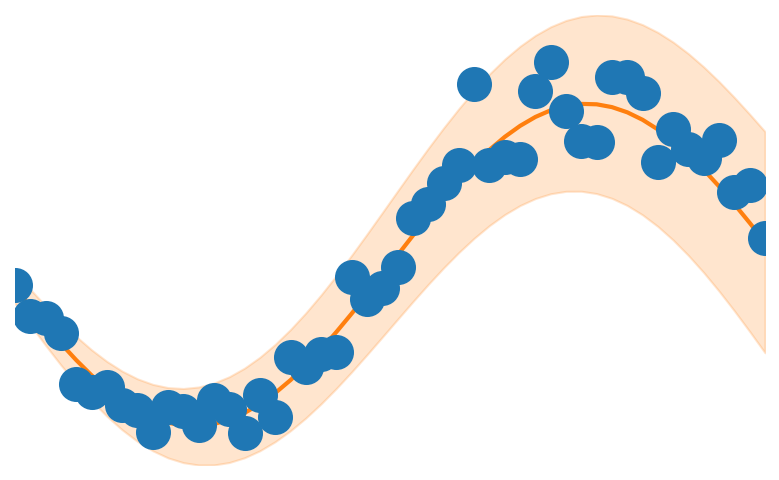

In [3]:
def plot_concept_n_unique(n_points: int = 50, seed: int = 42):
    """
    Plot one sine-shaped data-generating process with simple heteroscedastic noise.
    Matches the style of the other concept plots (orange CI, orange mean, blue points).
    """

    # Reproducibility
    rng = np.random.default_rng(seed)

    # --- Parameters ---
    x = np.linspace(-3, 3, n_points)
    f = np.sin(x)

    # Simple linear noise profile (0.05 → 0.35)
    noise_level = np.linspace(0.05, 0.35, n_points)

    # Observed points
    y = f + rng.normal(0, noise_level, size=n_points)

    # Predicted mean and confidence interval
    y_pred = f
    y_lower = y_pred - 1.96 * noise_level
    y_upper = y_pred + 1.96 * noise_level

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(5, 3))

    # Confidence interval (orange, transparent)
    ax.fill_between(x, y_lower, y_upper, color='tab:orange', alpha=0.2, zorder=1)

    # Prediction line (orange)
    ax.plot(x, y_pred, color='tab:orange', linewidth=2, zorder=2)

    # Observed points (blue)
    ax.scatter(x, y, color='tab:blue', s=250, alpha=1, zorder=3)

    # Remove axes and whitespace
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.margins(x=0, y=0)

    return fig


fig = plot_concept_n_unique()
FigureSaver.save_fig(fig, "concept_n_unique")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_n_rep.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_n_rep.pdf


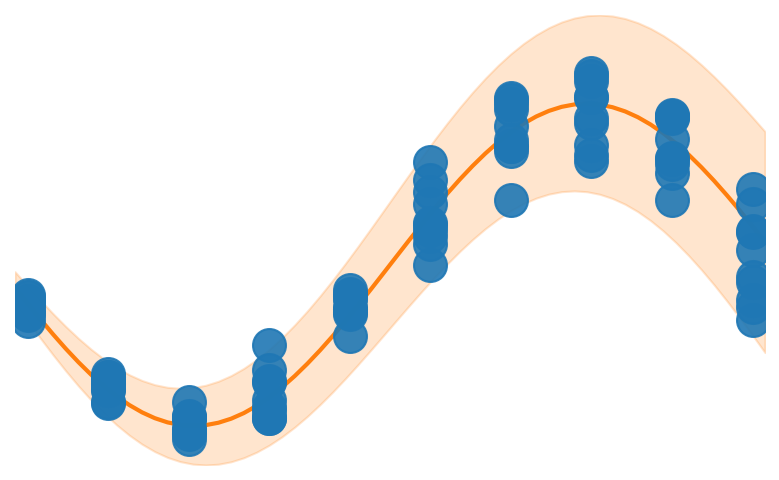

In [4]:
def plot_concept_n_rep(n_unique: int = 10, n_repeats: int = 10, seed: int = 42):
    """
    Plot a sine-shaped DGP with repeated x-values and simple heteroscedastic noise.
    Matches the visual style of the other concept plots (orange CI, mean line, blue points).
    Returns the Matplotlib figure.
    """

    rng = np.random.default_rng(seed)

    # === (A) Dense line and CI (smooth, "original" style) ===
    x_dense = np.linspace(-3, 3, 60)
    f_dense = np.sin(x_dense)

    # Simple linear noise (0.05 → 0.35)
    noise_level_dense = np.linspace(0.05, 0.35, len(x_dense))

    # Predicted mean and 95% CI
    y_pred_dense = f_dense
    y_lower_dense = y_pred_dense - 1.96 * noise_level_dense
    y_upper_dense = y_pred_dense + 1.96 * noise_level_dense

    # === (B) Observations with repeats ===
    x_base = np.linspace(-2.9, 2.9, n_unique)
    x = np.repeat(x_base, n_repeats)
    f = np.sin(x)

    # Noise: same simple linear form over [-3, 3]
    noise_level = np.interp(x, [-3, 3], [0.05, 0.35])
    y = f + rng.normal(0, noise_level, size=len(x))

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(5, 3))

    # CI (orange transparent)
    ax.fill_between(x_dense, y_lower_dense, y_upper_dense,
                    color='tab:orange', alpha=0.2, zorder=1)

    # Prediction line (orange)
    ax.plot(x_dense, y_pred_dense, color='tab:orange', linewidth=2, zorder=2)

    # Observed points (blue)
    ax.scatter(x, y, color='tab:blue', s=250, alpha=0.9, zorder=3)

    # Clean plot (no axes, no margins)
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.margins(x=0, y=0)

    return fig

fig = plot_concept_n_rep()
# Falls du deine Helper-Funktion nutzt:
FigureSaver.save_fig(fig, "concept_n_rep")


Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_in_between_ood.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_in_between_ood.pdf


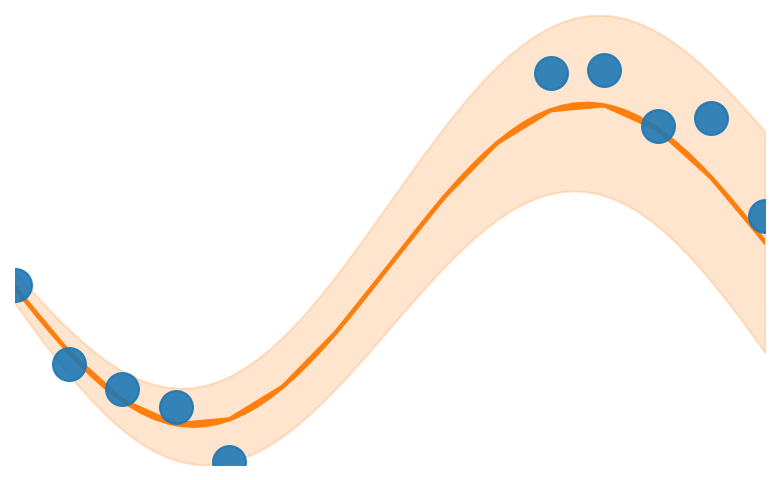

In [5]:
def plot_concept_in_between_ood(n_points: int = 15, seed: int = 42):
    """
    Plot a sine-shaped function with heteroscedastic noise (simple linear ramp),
    highlighting only out-of-distribution points (x outside [-1, 1]).
    Matches the style of the other concept plots (orange CI, mean line, blue points).
    """

    rng = np.random.default_rng(seed)

    # --- Parameters ---
    x = np.linspace(-3, 3, n_points)
    x_dense = np.linspace(-3, 3, 60)

    # True underlying function
    f = np.sin(x)
    f_dense = np.sin(x_dense)

    # Simple linear noise profile (0.05 → 0.35)
    noise_level = np.linspace(0.05, 0.35, n_points)
    noise_level_dense = np.linspace(0.05, 0.35, len(x_dense))

    # Observations
    y = f + rng.normal(0, noise_level, size=n_points)

    # Predicted mean and confidence intervals
    y_pred_dense = f_dense
    y_lower_dense = y_pred_dense - 1.96 * noise_level_dense
    y_upper_dense = y_pred_dense + 1.96 * noise_level_dense

    y_pred = f
    y_lower = y_pred - 1.96 * noise_level
    y_upper = y_pred + 1.96 * noise_level

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(5, 3))

    # Confidence interval (orange transparent)
    ax.fill_between(x_dense, y_lower_dense, y_upper_dense,
                    color='tab:orange', alpha=0.2, zorder=1)

    # Prediction mean line (orange)
    ax.plot(x_dense, y_pred_dense, color='tab:orange', linewidth=2, zorder=2)
    ax.plot(x, y_pred, color='tab:orange', linewidth=2, zorder=2)

    # Observed points (only outside [-1, 1])
    mask = (x < -1) | (x > 1)
    ax.scatter(x[mask], y[mask], color='tab:blue', s=250, alpha=0.9, zorder=3)

    # Clean, frameless layout
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.margins(x=0, y=0)

    return fig

fig = plot_concept_in_between_ood()
FigureSaver.save_fig(fig, "concept_in_between_ood")


Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_twofeat.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_twofeat.pdf


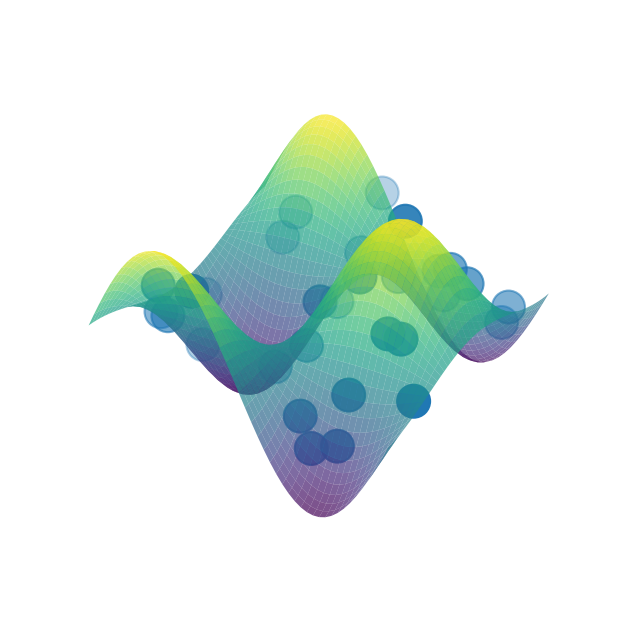

In [6]:
def plot_concept_twofeat(n_grid: int = 50, n_obs: int = 30, seed: int = 42):
    """
    Plot a simple 3D surface (two-feature concept plot) with a few observed data points.
    The function shown is Z = sin(X) * cos(Y).
    Matches the visual style of other concept plots (clean, no axes, coolwarm surface).

    Args:
        n_grid (int): Number of grid points per dimension for the surface.
        n_obs (int): Number of random observed points.
        seed (int): Random seed for reproducibility.

    Returns:
        fig (matplotlib.figure.Figure): The created Matplotlib figure.
    """
    rng = np.random.default_rng(seed)

    # --- Data ---
    x = np.linspace(-3, 3, n_grid)
    y = np.linspace(-3, 3, n_grid)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X) * np.cos(Y)

    # Observed points (optional)
    x_obs = rng.uniform(-3, 3, n_obs)
    y_obs = rng.uniform(-3, 3, n_obs)
    z_obs = np.sin(x_obs) * np.cos(y_obs) + rng.normal(0, 0.1, n_obs)

    # --- Plot ---
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection="3d")

    # Surface
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7, linewidth=0)

    # Observed points
    ax.scatter(x_obs, y_obs, z_obs, color="tab:blue", s=250)

    # Clean look (no axes or ticks)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()

    # Tight layout (no whitespace)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    return fig

fig = plot_concept_twofeat()
FigureSaver.save_fig(fig, "concept_twofeat")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_multi_target.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_multi_target.pdf


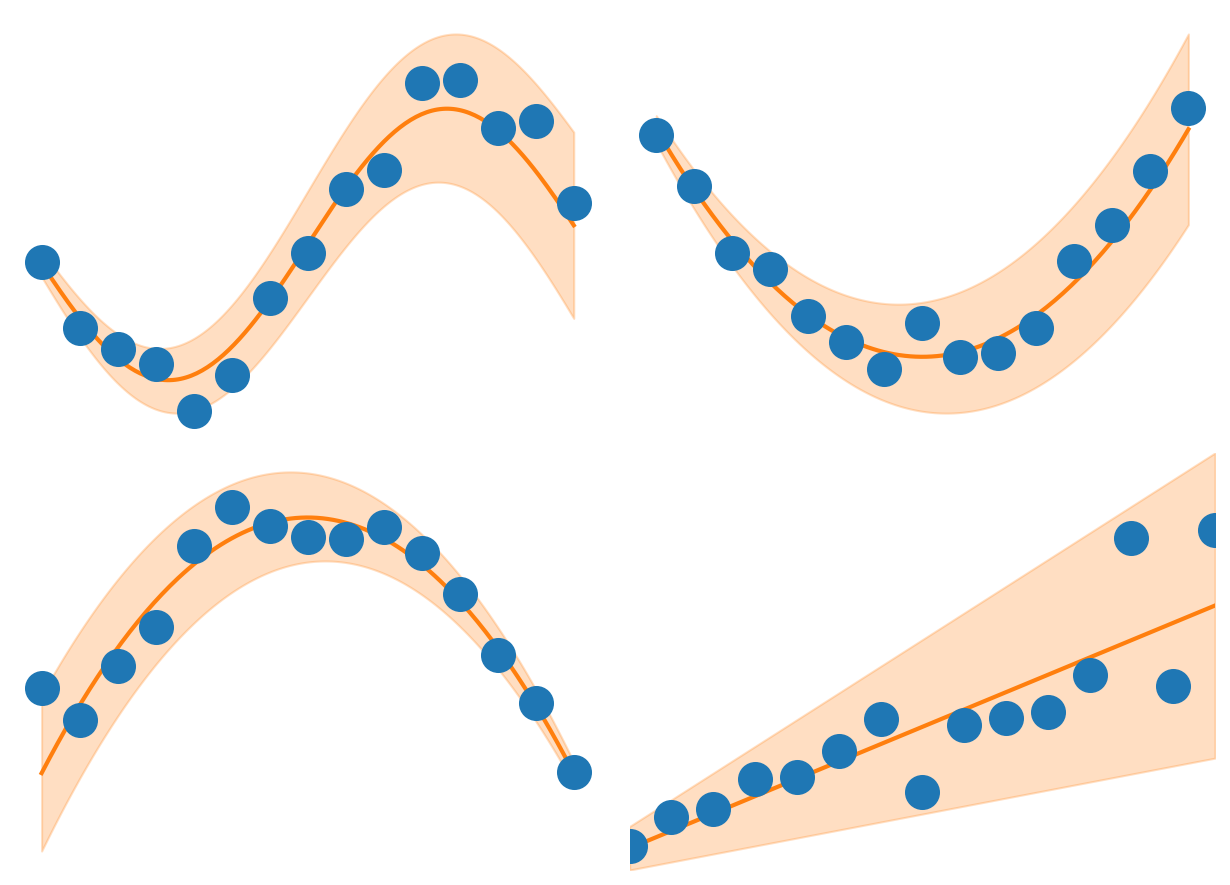

In [7]:
def plot_concept_multi_target(n_points: int = 15, seed: int = 42, n_dense: int = 200):
    """
    2x2 panel with four functions and simple heteroscedastic noise.
    Smooth (rounded) look: mean line and CI are plotted on a dense grid.
    Returns the Matplotlib figure.
    """
    rng = np.random.default_rng(seed)

    # Sparse grid (observations) and dense grid (smooth plotting)
    x = np.linspace(-3, 3, n_points)
    x_dense = np.linspace(-3, 3, n_dense)

    # Underlying functions on sparse & dense grids
    funcs_sparse = [
        np.sin(x),   # 1) baseline
        x**2,        # 2) quadratic
        -x**2,       # 3) negative quadratic
        x,           # 4) linear
    ]
    funcs_dense = [
        np.sin(x_dense),
        x_dense**2,
        -x_dense**2,
        x_dense,
    ]

    # Simple linear base noise 0.05 → 0.35
    base_noise_sparse = np.linspace(0.05, 0.35, n_points)
    base_noise_dense  = np.linspace(0.05, 0.35, n_dense)

    # Per-panel noise profiles (match sparse & dense, incl. reversed case)
    noise_sparse = [
        base_noise_sparse,                 # panel 1
        5.5 * base_noise_sparse,           # panel 2
        4.0 * base_noise_sparse[::-1],     # panel 3 (reversed)
        5.5 * base_noise_sparse,           # panel 4
    ]
    noise_dense = [
        base_noise_dense,                  # panel 1
        5.5 * base_noise_dense,            # panel 2
        4.0 * base_noise_dense[::-1],      # panel 3 (reversed)
        5.5 * base_noise_dense,            # panel 4
    ]

    # Figure
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    axes = axes.flatten()

    for ax, f_s, f_d, nl_s, nl_d in zip(axes, funcs_sparse, funcs_dense, noise_sparse, noise_dense):
        # Observations on sparse grid
        y = f_s + rng.normal(0.0, nl_s, size=n_points)

        # Predicted mean & CI on dense grid (smooth)
        y_pred_d = f_d
        y_lo_d = y_pred_d - 1.96 * nl_d
        y_hi_d = y_pred_d + 1.96 * nl_d

        # Draw CI and mean (dense → smooth/rounded)
        ax.fill_between(x_dense, y_lo_d, y_hi_d, color='tab:orange', alpha=0.25, zorder=1)
        ax.plot(x_dense, y_pred_d, color='tab:orange', linewidth=2, zorder=2)

        # Observed points (sparse)
        ax.scatter(x, y, color='tab:blue', s=250, alpha=1, zorder=3)

        ax.axis('off')

    plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0, wspace=0.05, hspace=0.05)
    plt.margins(0, 0)
    return fig

fig = plot_concept_multi_target()

FigureSaver.save_fig(fig, "concept_multi_target")

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


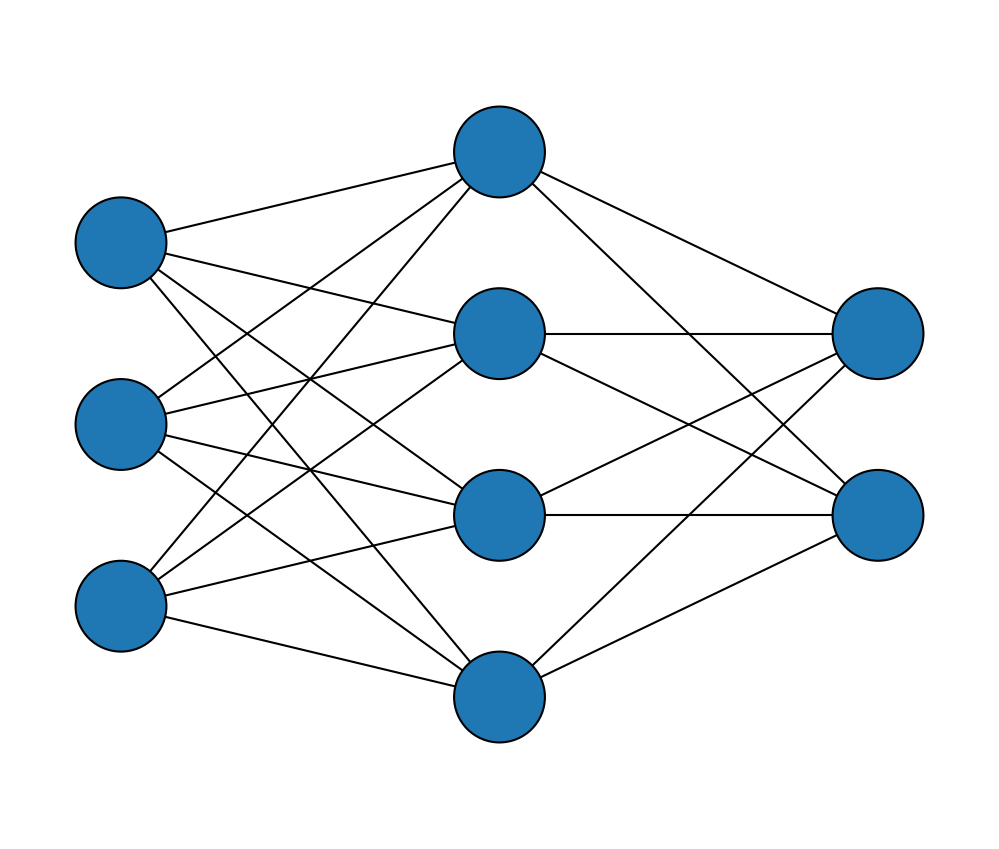

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_horizontal.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_horizontal.pdf


In [8]:
def plot_concept_nn():
    """
    Draw a simple neural network diagram with:
      - 3 input nodes
      - 1 hidden layer (4 units)
      - 2 output nodes

    The network is fully connected (all-to-all between layers),
    displayed with blue circular nodes and black connection lines.

    Returns:
        fig (matplotlib.figure.Figure): The created Matplotlib figure.
    """
    fig, ax = plt.subplots(figsize=(7, 6))

    # Layer sizes: Input, Hidden, Output
    sizes = [3, 4, 2]
    x = [0, 2.5, 5.0]  # horizontal positions
    v_gap = 1.2        # vertical spacing
    r = 0.3            # node radius

    # Helper to vertically center nodes in each layer
    def y_positions(n):
        if n == 1:
            return [0.0]
        total = (n - 1) * v_gap
        return [i * v_gap - total / 2 for i in range(n)]

    ys = [y_positions(n) for n in sizes]

    # Draw black connection lines first (under the nodes)
    for L in range(len(sizes) - 1):
        for y1 in ys[L]:
            for y2 in ys[L + 1]:
                ax.plot([x[L], x[L + 1]], [y1, y2],
                        color="black", linewidth=1.0, zorder=1)

    # Draw blue circular nodes (on top of lines)
    patches = []
    for xi, layer_ys in zip(x, ys):
        for y in layer_ys:
            patches.append(Circle((xi, y), r))
    pc = PatchCollection(
        patches,
        facecolor="tab:blue",
        edgecolor="black",
        linewidth=1.0,
        zorder=2
    )
    ax.add_collection(pc)

    # Formatting
    ax.set_aspect("equal", adjustable="datalim")
    ax.set_axis_off()

    # Set limits with padding to ensure nodes are not cut off
    all_x = [xi for xi in x]
    all_y = [yy for layer in ys for yy in layer]
    x_pad = 0.7
    y_pad = r + 0.4
    ax.set_xlim(min(all_x) - x_pad, max(all_x) + x_pad)
    ax.set_ylim(min(all_y) - y_pad, max(all_y) + y_pad)

    plt.tight_layout()
    plt.show()
    return fig

fig = plot_concept_nn()
FigureSaver.save_fig(fig, "concept_network_horizontal")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


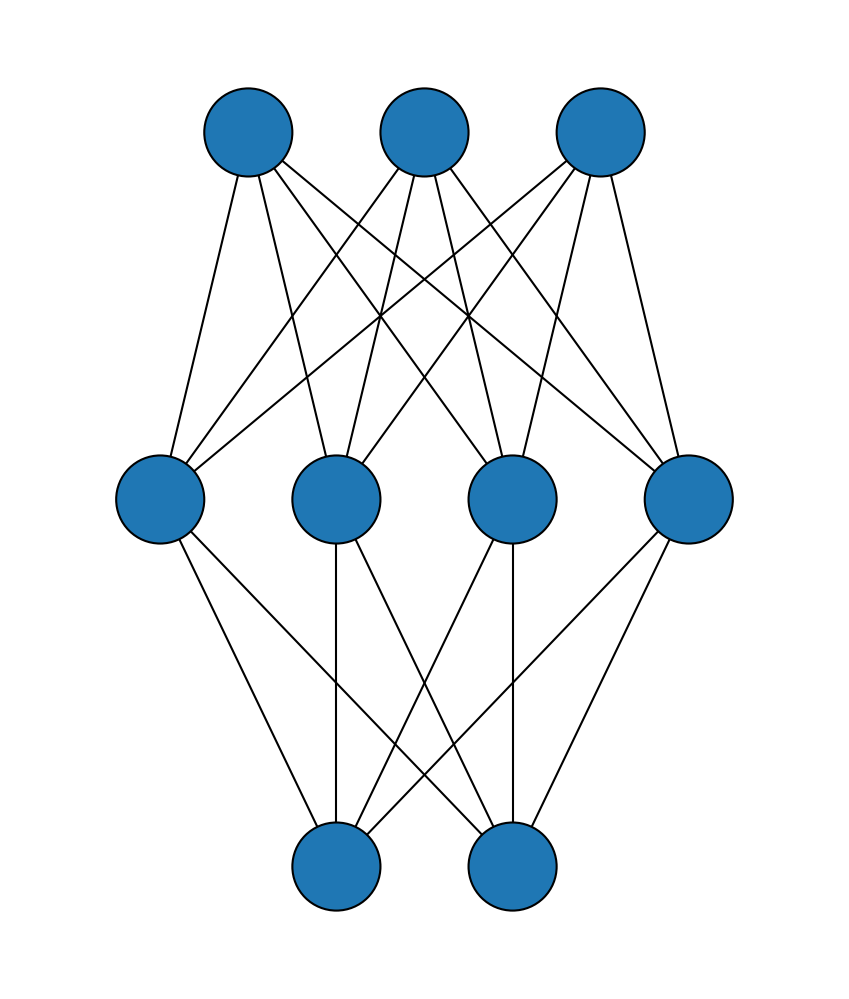

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_vertical.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_vertical.pdf


In [9]:
def plot_concept_nn_vertical():
    """
    Like plot_concept_nn(), but the network layers are arranged
    vertically (top to bottom) instead of horizontally.
    """
    fig, ax = plt.subplots(figsize=(6, 7))

    # Layer sizes: Input, Hidden, Output
    sizes = [3, 4, 2]
    
    # Vertical positions of the layers (top → bottom)
    y = [0, -2.5, -5.0]   
    h_gap = 1.2           # Horizontal spacing between nodes
    r = 0.3               # Node radius

    # Helper function for horizontal centering of nodes in each layer
    def x_positions(n):
        if n == 1:
            return [0.0]
        total = (n - 1) * h_gap
        return [i * h_gap - total / 2 for i in range(n)]

    xs = [x_positions(n) for n in sizes]

    # Connection lines between layers
    for L in range(len(sizes) - 1):
        for x1 in xs[L]:
            for x2 in xs[L + 1]:
                ax.plot([x1, x2], [y[L], y[L + 1]],
                        color="black", linewidth=1.0, zorder=1)

    # Draw nodes
    patches = []
    for yi, layer_xs in zip(y, xs):
        for x in layer_xs:
            patches.append(Circle((x, yi), r))

    pc = PatchCollection(
        patches,
        facecolor="tab:blue",
        edgecolor="black",
        linewidth=1.0,
        zorder=2
    )
    ax.add_collection(pc)

    # Formatting
    ax.set_aspect("equal", adjustable="datalim")
    ax.set_axis_off()

    # Set axis limits
    all_x = [xx for layer in xs for xx in layer]
    all_y = [yy for yy in y]
    x_pad = r + 0.4
    y_pad = 0.8
    ax.set_xlim(min(all_x) - x_pad, max(all_x) + x_pad)
    ax.set_ylim(min(all_y) - y_pad, max(all_y) + y_pad)

    plt.tight_layout()
    plt.show()
    return fig


fig = plot_concept_nn_vertical()
FigureSaver.save_fig(fig, "concept_network_vertical")


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


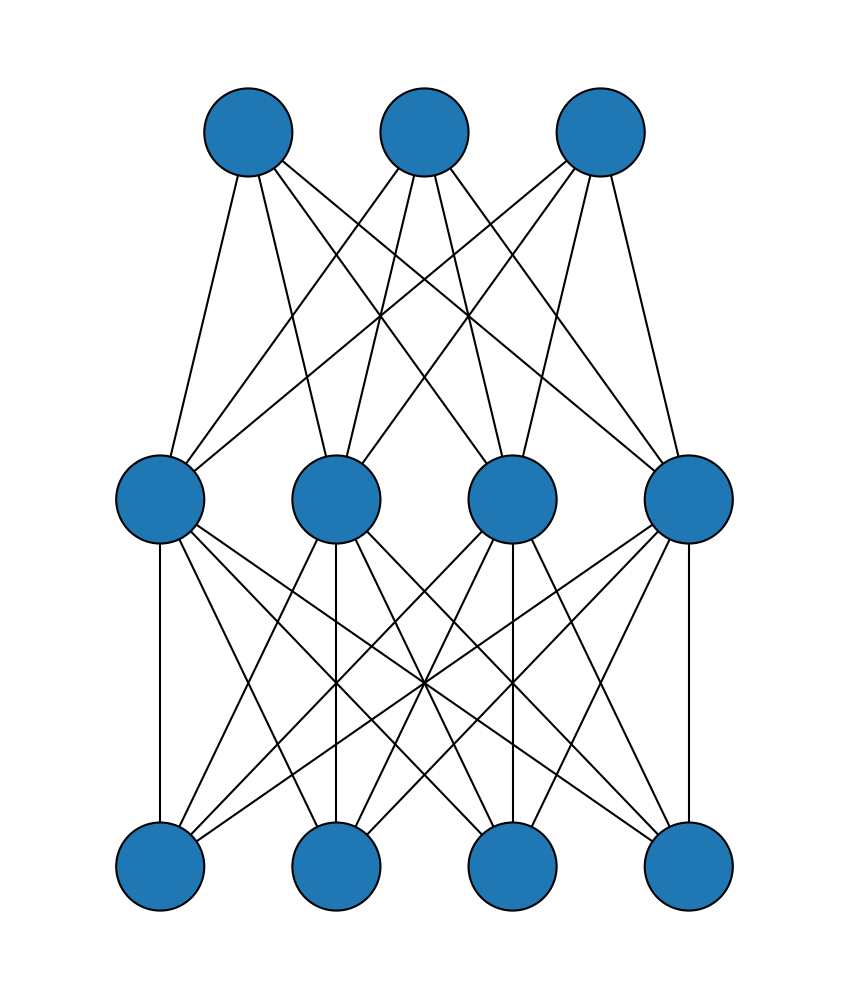

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_der.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/concept_network_der.pdf


In [10]:
def plot_concept_nn_der():
    """
    Like plot_concept_nn_vertical(), but with 4 outputs.
    """
    fig, ax = plt.subplots(figsize=(6, 7))

    # Layer sizes: Input, Hidden, Output
    sizes = [3, 4, 4]
    
    # Vertical positions of the layers (top → bottom)
    y = [0, -2.5, -5.0]
    h_gap = 1.2           # Horizontal spacing between nodes
    r = 0.3               # Node radius

    # Helper function for horizontal centering of each layer
    def x_positions(n):
        if n == 1:
            return [0.0]
        total = (n - 1) * h_gap
        return [i * h_gap - total / 2 for i in range(n)]

    xs = [x_positions(n) for n in sizes]

    # Connection lines between layers
    for L in range(len(sizes) - 1):
        for x1 in xs[L]:
            for x2 in xs[L + 1]:
                ax.plot([x1, x2], [y[L], y[L + 1]],
                        color="black", linewidth=1.0, zorder=1)

    # Nodes
    patches = []
    for yi, layer_xs in zip(y, xs):
        for x in layer_xs:
            patches.append(Circle((x, yi), r))

    pc = PatchCollection(
        patches,
        facecolor="tab:blue",
        edgecolor="black",
        linewidth=1.0,
        zorder=2
    )
    ax.add_collection(pc)

    # Formatting
    ax.set_aspect("equal", adjustable="datalim")
    ax.set_axis_off()

    # Axis limits
    all_x = [xx for layer in xs for xx in layer]
    all_y = [yy for yy in y]
    x_pad = r + 0.4
    y_pad = 0.8
    ax.set_xlim(min(all_x) - x_pad, max(all_x) + x_pad)
    ax.set_ylim(min(all_y) - y_pad, max(all_y) + y_pad)

    plt.tight_layout()
    plt.show()
    return fig


fig = plot_concept_nn_der()
FigureSaver.save_fig(fig, "concept_network_der")

In [ ]:
def plot_sources_uncertainty(
    n_points: int = 1000,
    seed: int = 42,
    x_range=(-6.0, 6.0),
    figsize=(20, 10),
    mean_lw: float = 1.5,     # thickness of the true-function line
    dashed_lw: float = 3.0,   # thickness of all dashed model lines
    sigma_homo=5,
    sigma_hetero=None,
    f_true=None,
):
    """
    Plot a 2×3 grid illustrating the main *sources of uncertainty* in modeling.

    Layout:
        ┌───────────────────────────┬──────────────────────────────┬──────────────────────────────┐
        │ (a) Model                 │ (b) Data                     │ (c) Procedural               │
        │     uncertainty           │     uncertainty              │     uncertainty              │
        ├───────────────────────────┼──────────────────────────────┼──────────────────────────────┤
        │ (d) Distributional        │ (e) Homoscedastic            │ (f) Heteroscedastic          │
        │     uncertainty (OOD)     │     aleatoric noise          │     aleatoric noise          │
        └───────────────────────────┴──────────────────────────────┴──────────────────────────────┘

    Description:
        - **Top-left (a)**: Model uncertainty — linear model approximation of nonlinear truth.
        - **Top-middle (b)**: Data uncertainty — two datasets (A, B) lead to slightly different models.
        - **Top-right (c)**: Procedural uncertainty — two models trained with different
          random seeds diverge as data becomes sparser.
        - **Bottom-left (d)**: Distributional uncertainty — model trained only on in-distribution
          data in [-2, 2]; OOD regions shaded gray; model extrapolates linearly.
        - **Bottom-middle (e)**: Homoscedastic noise — constant variance across inputs.
        - **Bottom-right (f)**: Heteroscedastic noise — variance increases with input.

    Args:
        n_points (int): Number of training points for top-row scatter examples.
        seed (int): Random seed for reproducibility.
        x_range (tuple[float, float]): Range of x-values across all subplots.
        figsize (tuple[float, float]): Figure size in inches.
        mean_lw (float): Line width of the true function.
        dashed_lw (float): Line width of the dashed model lines.
        sigma_homo (float | callable): Homoscedastic noise standard deviation.
        sigma_hetero (callable): Heteroscedastic noise standard deviation function.
        ood_bounds (tuple[float, float]): In-distribution bounds (used for OOD shading).
        f_true (callable | None): True underlying function f*(x). Defaults to x³ if None.

    Returns:
        fig (matplotlib.figure.Figure): The Matplotlib figure object.
        axs (np.ndarray[plt.Axes]): Array of subplot axes (2×3 grid).

    Notes:
        - All subplots share unified y-axis limits for visual consistency.
        - Use `dashed_lw` to control model line thickness.
        - OOD regions are shaded light gray in the bottom-left panel.
    """

    if sigma_hetero is None:
        raise ValueError("Please provide sigma_hetero (Callable).")

    rng = np.random.default_rng(seed)
    lo, hi = float(x_range[0]), float(x_range[1])

    # ---- true function helper ----
    def f_star(X):
        X = np.asarray(X).reshape(-1)
        if f_true is None:
            return X**3
        return np.asarray(f_true(X)).reshape(-1)

    # sigma helpers
    def _as_sigma_fn(s):
        if callable(s):
            return lambda X: np.asarray(s(X)).reshape(-1)
        s = float(s)
        return lambda X: np.full(np.asarray(X).shape, s, dtype=float).reshape(-1)

    sig_h = _as_sigma_fn(sigma_homo)
    sig_H = _as_sigma_fn(sigma_hetero)

    # grid & colors
    xg = np.linspace(lo, hi, 1200)
    fg = f_star(xg)

    # --- Custom colors ---
    blue = "#1f77b4"
    green = "#2ca02c"
    orange = "#ff7f0e"
    gray = "gray"

    # --- Larger points for visibility ---
    pt_size = max(60, int(mean_lw * 14))

    fig, axs = plt.subplots(2, 3, figsize=figsize, sharex=False)

    # new axis layout
    ax_model          = axs[0, 0]  # (a) Model
    ax_data           = axs[0, 1]  # (b) Data
    ax_procedural     = axs[0, 2]  # (c) Procedural
    ax_distributional = axs[1, 0]  # (d) Distributional
    ax_homo           = axs[1, 1]  # (e) Homoscedastic
    ax_hetero         = axs[1, 2]  # (f) Heteroscedastic

    def _clean(ax):
        ax.set_xticks([]); ax.set_yticks([])
        ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

    # ---------- Aleatoric data ----------
    X = rng.uniform(lo, hi, size=n_points)
    fX = f_star(X)
    y_homo = fX + rng.normal(0.0, sig_h(X), size=fX.shape)
    y_hetero = fX + rng.normal(0.0, sig_H(X), size=fX.shape)

    # ---------- (e) Homoscedastic (now bottom-middle) ----------
    ax = ax_homo
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)
    ax.scatter(X, y_homo, s=pt_size, alpha=0.85, color=blue, label=r"$\mathcal{D}$", zorder=1)
    ax.set_title("e) Homoscedastic aleatoric uncertainty")
    ax.set_xlabel("$x$"); ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- (f) Heteroscedastic (now bottom-right) ----------
    ax = ax_hetero
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)
    ax.scatter(X, y_hetero, s=pt_size, alpha=0.85, color=blue, label=r"$\mathcal{D}$", zorder=1)
    ax.set_title("f) Heteroscedastic aleatoric uncertainty")
    ax.set_xlabel("$x$"); ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- (d) Distributional (now bottom-left) ----------
    id_left, id_right = -2.0,  2.0
    id_mask = (xg >= id_left) & (xg <= id_right)
    model_dist = np.empty_like(fg)
    model_dist[id_mask] = fg[id_mask]
    grad = np.gradient(fg, xg)
    r_idx = np.searchsorted(xg, id_right, side="right") - 1
    r_idx = np.clip(r_idx, 0, len(xg)-1)
    xr, yr, sr = xg[r_idx], fg[r_idx], grad[r_idx]
    l_idx = np.searchsorted(xg, id_left, side="left")
    l_idx = np.clip(l_idx, 0, len(xg)-1)
    xl, yl, sl = xg[l_idx], fg[l_idx], grad[l_idx]
    mask_r = xg > id_right
    mask_l = xg < id_left
    model_dist[mask_r] = yr + sr * (xg[mask_r] - xr)
    model_dist[mask_l] = yl + sl * (xg[mask_l] - xl)

    ax = ax_distributional
    ax.set_xlim(lo, hi)
    if id_left > lo:
        ax.axvspan(lo, id_left, color=gray, alpha=0.18)
    if id_right < hi:
        ax.axvspan(id_right, hi, color=gray, alpha=0.18)

    ax.plot(xg, fg, color=orange, linewidth=mean_lw,
            label=r"$f^*$", zorder=1)
    sample_x = np.linspace(id_left, id_right, 24)
    ax.scatter(sample_x, f_star(sample_x), s=pt_size, color=blue,
            alpha=0.95, label=r"$\mathcal{D}$", zorder=2)
    ax.plot(xg, model_dist, ls="--", lw=dashed_lw, color=blue,
            label=r"$\hat{h}_{\mathcal{D},\gamma}$", zorder=1)

    ood_patch = Patch(color=gray, alpha=0.18, label="OOD")

    handles, labels = ax.get_legend_handles_labels()
    lookup = dict(zip(labels, handles))

    ordered_handles = [
        lookup[r"$f^*$"],
        lookup[r"$\hat{h}_{\mathcal{D},\gamma}$"],
        lookup[r"$\mathcal{D}$"],
        ood_patch,
    ]

    ax.legend(
        handles=ordered_handles,
        loc="upper left",
        frameon=True,
        facecolor="white",
        framealpha=0.9,
    )

    ax.set_title("d) Distributional uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    _clean(ax)

    # ---------- (c) Procedural (now top-right) ----------
    ax = ax_procedural
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)

    # Amplitude grows as data becomes sparser
    t = (xg - lo) / (hi - lo)
    ampP = 0.08 * (np.max(np.abs(fg)) + 1e-9) * (0.4 + 2.5 * t**1.8)
    model_A = fg + ampP * np.sin(0.9 * xg)
    model_B = fg - ampP * np.sin(0.9 * xg)
    n_points_total = 35
    frac = np.geomspace(1e-3, 1, n_points_total)
    xs_proc = lo + (hi - lo) * frac
    ax.plot(xg, model_A, ls="--", lw=dashed_lw, color=blue,  label=r"$\hat{h}_{\mathcal{D},\gamma_1}$", zorder=1)
    ax.plot(xg, model_B, ls="--", lw=dashed_lw, color=green, label=r"$\hat{h}_{\mathcal{D},\gamma_2}$", zorder=1)
    ax.scatter(xs_proc, f_star(xs_proc), s=pt_size, color=blue, alpha=0.95,
               label=r"$\mathcal{D}$", zorder=3)
    ax.set_title("c) Procedural uncertainty")
    ax.set_xlabel("$x$"); ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- (a) Model (now top-left) ----------
    ax = ax_model
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=1)
    lin_fit = np.poly1d(np.polyfit(xg, fg, 1))(xg)
    ax.plot(xg, lin_fit, ls="--", lw=dashed_lw, color=blue, label=r"$h^*$", zorder=1)
    sample_x_mod = np.linspace(lo, hi, 20)
    ax.scatter(sample_x_mod, f_star(sample_x_mod), s=pt_size, color=blue, alpha=0.95,
               label=r"$\mathcal{D}$", zorder=2)
    ax.set_title("a) Model uncertainty")
    ax.set_xlabel("$x$"); ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- (b) Data (now top-middle) ----------
    ax = ax_data
    n_demo = 18
    xs_all = np.linspace(lo, hi, n_demo)
    ys_all = f_star(xs_all)
    Xa, Xb = xs_all[::2], xs_all[1::2]

    ax.plot(
        xg,
        fg,
        color=orange,
        linewidth=mean_lw,
        label=r"$f^*$",
        zorder=1,
    )

    amp_base = 0.12 * (np.max(np.abs(fg)) + 1e-9)
    wiggle = 0.6 * np.sin(1.3 * xg)
    slight_tr = 0.15 * xg
    deviation = amp_base * (wiggle + slight_tr)
    model_a = fg + deviation
    model_b = fg - deviation

    ax.plot(
        xg,
        model_a,
        ls="--",
        lw=dashed_lw,
        color=blue,
        label=r"$\hat{h}_{\mathcal{D}_1,\gamma}$",
        zorder=1,
    )
    ax.plot(
        xg,
        model_b,
        ls="--",
        lw=dashed_lw,
        color=green,
        label=r"$\hat{h}_{\mathcal{D}_2,\gamma}$",
        zorder=1,
    )

    yA_on_line = np.interp(Xa, xg, model_a)
    yB_on_line = np.interp(Xb, xg, model_b)

    ax.scatter(
        Xa,
        yA_on_line,
        s=pt_size,
        color=blue,
        alpha=0.95,
        marker="o",
        label=r"$\mathcal{D}_1$",
        zorder=2,
    )
    ax.scatter(
        Xb,
        yB_on_line,
        s=pt_size,
        color=green,
        alpha=0.95,
        marker="o",
        label=r"$\mathcal{D}_2$",
        zorder=2,
    )

    ax.set_title("b) Data uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- Unified y-limits ----------
    y_collect = [
        fg, y_homo, y_hetero,
        f_star(sample_x), f_star(xs_proc), f_star(sample_x_mod),
        f_star(Xa), f_star(Xb),
        model_dist, model_A, model_B, lin_fit, model_a, model_b
    ]
    y_all = np.concatenate([np.ravel(v) for v in y_collect if v is not None and np.size(v) > 0])
    y_min, y_max = np.min(y_all), np.max(y_all)
    pad = 0.06 * (y_max - y_min + 1e-9)
    for a in axs.ravel():
        a.set_ylim(y_min - pad, y_max + pad)

    plt.tight_layout()
    plt.show()
    return fig, axs


In [ ]:
def plot_uncertainty_grid(
    n_points: int = 1000,
    seed: int = 42,
    x_range=(-6.0, 6.0),
    figsize=(20, 10),
    mean_lw: float = 1.5,
    dashed_lw: float = 3.0,
    sigma_homo=5,
    sigma_hetero=None,
    f_true=None,
):
    """
    Plot a 2×3-like grid (implemented with a 2×6 GridSpec) illustrating
    different sources of uncertainty in supervised learning.

    Layout (conceptual):

        Epistemic uncertainty (row label on the left)
            (a) Model uncertainty
            (b) Estimation uncertainty
            (c) Distributional uncertainty

        Aleatoric uncertainty (row label on the left)
                (d) Homoscedastic aleatoric uncertainty
                (e) Heteroscedastic aleatoric uncertainty

    Top row (epistemic):
        - (a) Model uncertainty:
              Nonlinear true function vs. linear model ẑ(x) = \hat{h}(x).
        - (b) Estimation uncertainty:
              Two models \hat{h}_1, \hat{h}_2 trained on the same data with
              different random seeds / procedures.
        - (c) Distributional uncertainty:
              Model \hat{h}_1 trained on in-distribution data in [-2, 2],
              linearly extrapolated to OOD regions.

    Bottom row (aleatoric):
        - (d) Homoscedastic aleatoric uncertainty:
              Constant-variance noise σ_homo across inputs.
        - (e) Heteroscedastic aleatoric uncertainty:
              Input-dependent variance σ_hetero(x).
    """

    if sigma_hetero is None:
        raise ValueError("Please provide sigma_hetero (callable).")

    rng = np.random.default_rng(seed)
    lo, hi = float(x_range[0]), float(x_range[1])

    # -----------------------------
    # True function and noise scales
    # -----------------------------
    def f_star(X):
        X = np.asarray(X).reshape(-1)
        if f_true is None:
            return X**3
        return np.asarray(f_true(X)).reshape(-1)

    def _as_sigma_fn(s):
        if callable(s):
            return lambda X: np.asarray(s(X)).reshape(-1)
        s = float(s)
        return lambda X: np.full(np.asarray(X).shape, s, dtype=float).reshape(-1)

    sig_h = _as_sigma_fn(sigma_homo)
    sig_H = _as_sigma_fn(sigma_hetero)

    # -----------------------------
    # Grid and basic colors
    # -----------------------------
    xg = np.linspace(lo, hi, 1200)
    fg = f_star(xg)

    blue   = "tab:blue"
    orange = "tab:orange"
    green  = "tab:green"
    gray   = "#595959"

    pt_size = max(60, int(mean_lw * 14))

    # -----------------------------
    # Figure and GridSpec layout
    # -----------------------------
    fig = plt.figure(figsize=figsize)

    # Left margin is small but leaves room for rotated row labels and lines
    g_left, g_right, g_bottom, g_top = 0.14, 0.98, 0.12, 0.93
    gs = GridSpec(
        2, 6,
        figure=fig,
        left=g_left,
        right=g_right,
        bottom=g_bottom,
        top=g_top,
        wspace=0.55,
        hspace=0.4,
    )

    # Top row (3 panels)
    ax_model          = fig.add_subplot(gs[0, 0:2])  # (a)
    ax_estimation     = fig.add_subplot(gs[0, 2:4])  # (b)
    ax_distributional = fig.add_subplot(gs[0, 4:6])  # (c)

    # Bottom row (2 panels, centered under top row)
    ax_homo   = fig.add_subplot(gs[1, 1:3])          # (d)
    ax_hetero = fig.add_subplot(gs[1, 3:5])          # (e)

    def _clean(ax):
        """Hide ticks and top/right spines to keep the panels visually light."""
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    # -----------------------------
    # Aleatoric data generation
    # -----------------------------
    X = rng.uniform(lo, hi, size=n_points)
    fX = f_star(X)
    y_homo    = fX + rng.normal(0.0, sig_h(X), size=fX.shape)
    y_hetero  = fX + rng.normal(0.0, sig_H(X), size=fX.shape)

    # ============================================================
    # (d) Homoscedastic aleatoric uncertainty
    # ============================================================
    ax = ax_homo
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)
    ax.scatter(X, y_homo, s=pt_size, alpha=0.85, color=blue,
               label=r"$\mathcal{D}$", zorder=1)
    ax.set_title("d) Homoscedastic aleatoric uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True)
    _clean(ax)

    # ============================================================
    # (e) Heteroscedastic aleatoric uncertainty
    # ============================================================
    ax = ax_hetero
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)
    ax.scatter(X, y_hetero, s=pt_size, alpha=0.85, color=blue,
               label=r"$\mathcal{D}$", zorder=1)
    ax.set_title("e) Heteroscedastic aleatoric uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True)
    _clean(ax)

    # ============================================================
    # (c) Distributional uncertainty (OOD)
    # ============================================================
    id_left, id_right = -2.0, 2.0
    id_mask = (xg >= id_left) & (xg <= id_right)

    model_dist = np.empty_like(fg)
    model_dist[id_mask] = fg[id_mask]

    grad = np.gradient(fg, xg)
    r_idx = np.searchsorted(xg, id_right, side="right") - 1
    r_idx = np.clip(r_idx, 0, len(xg) - 1)
    xr, yr, sr = xg[r_idx], fg[r_idx], grad[r_idx]

    l_idx = np.searchsorted(xg, id_left, side="left")
    l_idx = np.clip(l_idx, 0, len(xg) - 1)
    xl, yl, sl = xg[l_idx], fg[l_idx], grad[l_idx]

    mask_r = xg > id_right
    mask_l = xg < id_left
    model_dist[mask_r] = yr + sr * (xg[mask_r] - xr)
    model_dist[mask_l] = yl + sl * (xg[mask_l] - xl)

    ax = ax_distributional
    ax.set_xlim(lo, hi)

    # Shade OOD regions
    if id_left > lo:
        ax.axvspan(lo, id_left, color=gray, alpha=0.18)
    if id_right < hi:
        ax.axvspan(id_right, hi, color=gray, alpha=0.18)

    ax.plot(xg, fg, color=orange, linewidth=mean_lw,
            label=r"$f^*$", zorder=1)
    sample_x = np.linspace(id_left, id_right, 24)
    ax.scatter(sample_x, f_star(sample_x), s=pt_size, color=blue,
               alpha=0.95, label=r"$\mathcal{D}$", zorder=2)
    ax.plot(xg, model_dist, ls="--", lw=dashed_lw, color=blue,
            label=r"$\hat{h}_1$", zorder=1)

    ood_patch = Patch(color=gray, alpha=0.18, label="OOD")

    handles, labels = ax.get_legend_handles_labels()
    lookup = dict(zip(labels, handles))
    ordered_handles = [
        lookup[r"$f^*$"],
        lookup[r"$\hat{h}_1$"],
        lookup[r"$\mathcal{D}$"],
        ood_patch,
    ]

    ax.legend(handles=ordered_handles, loc="upper left", frameon=True)
    ax.set_title("c) Distributional uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    _clean(ax)

    # ============================================================
    # (a) Model uncertainty
    # ============================================================
    ax = ax_model
    ax.plot(xg, fg, color=orange, linewidth=mean_lw,
            label=r"$f^*$", zorder=1)

    lin_fit = np.poly1d(np.polyfit(xg, fg, 1))(xg)
    ax.plot(xg, lin_fit, ls="--", lw=dashed_lw, color=blue,
            label=r"$\hat{h}$", zorder=1)

    sample_x_mod = np.linspace(lo, hi, 20)
    ax.scatter(sample_x_mod, f_star(sample_x_mod), s=pt_size,
               color=blue, alpha=0.95, label=r"$\mathcal{D}$", zorder=2)
    ax.set_title("a) Model uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True)
    _clean(ax)

    # ============================================================
    # (b) Estimation uncertainty
    # ============================================================
    ax = ax_estimation
    ax.plot(xg, fg, color=orange, linewidth=mean_lw,
            label=r"$f^*$", zorder=2)

    t = (xg - lo) / (hi - lo)
    ampP = 0.08 * (np.max(np.abs(fg)) + 1e-9) * (0.4 + 2.5 * t**1.8)
    model_A = fg + ampP * np.sin(0.9 * xg)
    model_B = fg - ampP * np.sin(0.9 * xg)

    n_points_total = 35
    frac = np.geomspace(1e-3, 1, n_points_total)
    xs_proc = lo + (hi - lo) * frac

    ax.plot(xg, model_A, ls="--", lw=dashed_lw, color=blue,
            label=r"$\hat{h}_1$", zorder=1)
    ax.plot(xg, model_B, ls="--", lw=dashed_lw, color=green,
            label=r"$\hat{h}_2$", zorder=1)
    ax.scatter(xs_proc, f_star(xs_proc), s=pt_size, color=blue,
               alpha=0.95, label=r"$\mathcal{D}$", zorder=3)
    ax.set_title("b) Estimation uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True)
    _clean(ax)

    # ============================================================
    # Shared y-limits across all panels
    # ============================================================
    y_collect = [
        fg, y_homo, y_hetero,
        f_star(sample_x), f_star(sample_x_mod), f_star(xs_proc),
        model_dist, model_A, model_B, lin_fit
    ]
    y_all = np.concatenate(
        [np.ravel(v) for v in y_collect if v is not None and np.size(v) > 0]
    )
    y_min, y_max = np.min(y_all), np.max(y_all)
    pad = 0.06 * (y_max - y_min + 1e-9)

    for ax in [ax_model, ax_estimation, ax_distributional, ax_homo, ax_hetero]:
        ax.set_ylim(y_min - pad, y_max + pad)

    # ============================================================
    # Fine positioning tweaks for horizontal spacing
    # ============================================================
    delta_top = 0.01      # shrink gap between (a)-(b)-(c)
    delta_bottom = 0.01   # increase gap between (d) and (e)

    pos_model = ax_model.get_position()
    pos_dist  = ax_distributional.get_position()
    pos_homo  = ax_homo.get_position()
    pos_hetero = ax_hetero.get_position()

    ax_model.set_position([
        pos_model.x0 + delta_top,
        pos_model.y0,
        pos_model.width,
        pos_model.height,
    ])

    ax_distributional.set_position([
        pos_dist.x0 - delta_top,
        pos_dist.y0,
        pos_dist.width,
        pos_dist.height,
    ])

    ax_homo.set_position([
        pos_homo.x0 - delta_bottom,
        pos_homo.y0,
        pos_homo.width,
        pos_homo.height,
    ])

    ax_hetero.set_position([
        pos_hetero.x0 + delta_bottom,
        pos_hetero.y0,
        pos_hetero.width,
        pos_hetero.height,
    ])

    # ============================================================
    # Row labels + separating lines
    # ============================================================
    trans_fig = fig.transFigure

    row_height = (g_top - g_bottom) / 2.0
    row1_center = g_top - row_height / 2.0   # top row center (epistemic)
    row2_center = g_bottom + row_height / 2.0  # bottom row center (aleatoric)
    y_sep = g_bottom + row_height             # row separation line

    x_line = g_left - 0.015   # vertical line x-pos
    x_text = g_left - 0.045   # row labels x-pos

    title_fs = plt.rcParams.get("axes.titlesize", plt.rcParams.get("font.size", 18))

    # Vertical line spanning both rows
    fig.lines.append(
        plt.Line2D(
            [x_line, x_line],
            [g_bottom, g_top],
            transform=trans_fig,
            color="black",
            linewidth=1.2,
        )
    )

    # Horizontal line separating epistemic and aleatoric rows
    fig.lines.append(
        plt.Line2D(
            [x_text - 0.01, g_right],
            [y_sep, y_sep],
            transform=trans_fig,
            color="black",
            linewidth=1.0,
        )
    )

    # Rotated row labels
    fig.text(
        x_text, row1_center,
        "Epistemic\nuncertainty",
        ha="center", va="center",
        rotation=90,
        fontsize=title_fs,
        fontweight="bold",
    )

    fig.text(
        x_text, row2_center,
        "Aleatoric\nuncertainty",
        ha="center", va="center",
        rotation=90,
        fontsize=title_fs,
        fontweight="bold",
    )

    plt.show()

    axs = {
        "model": ax_model,
        "estimation": ax_estimation,
        "distributional": ax_distributional,
        "homo": ax_homo,
        "hetero": ax_hetero,
    }
    return fig, axs


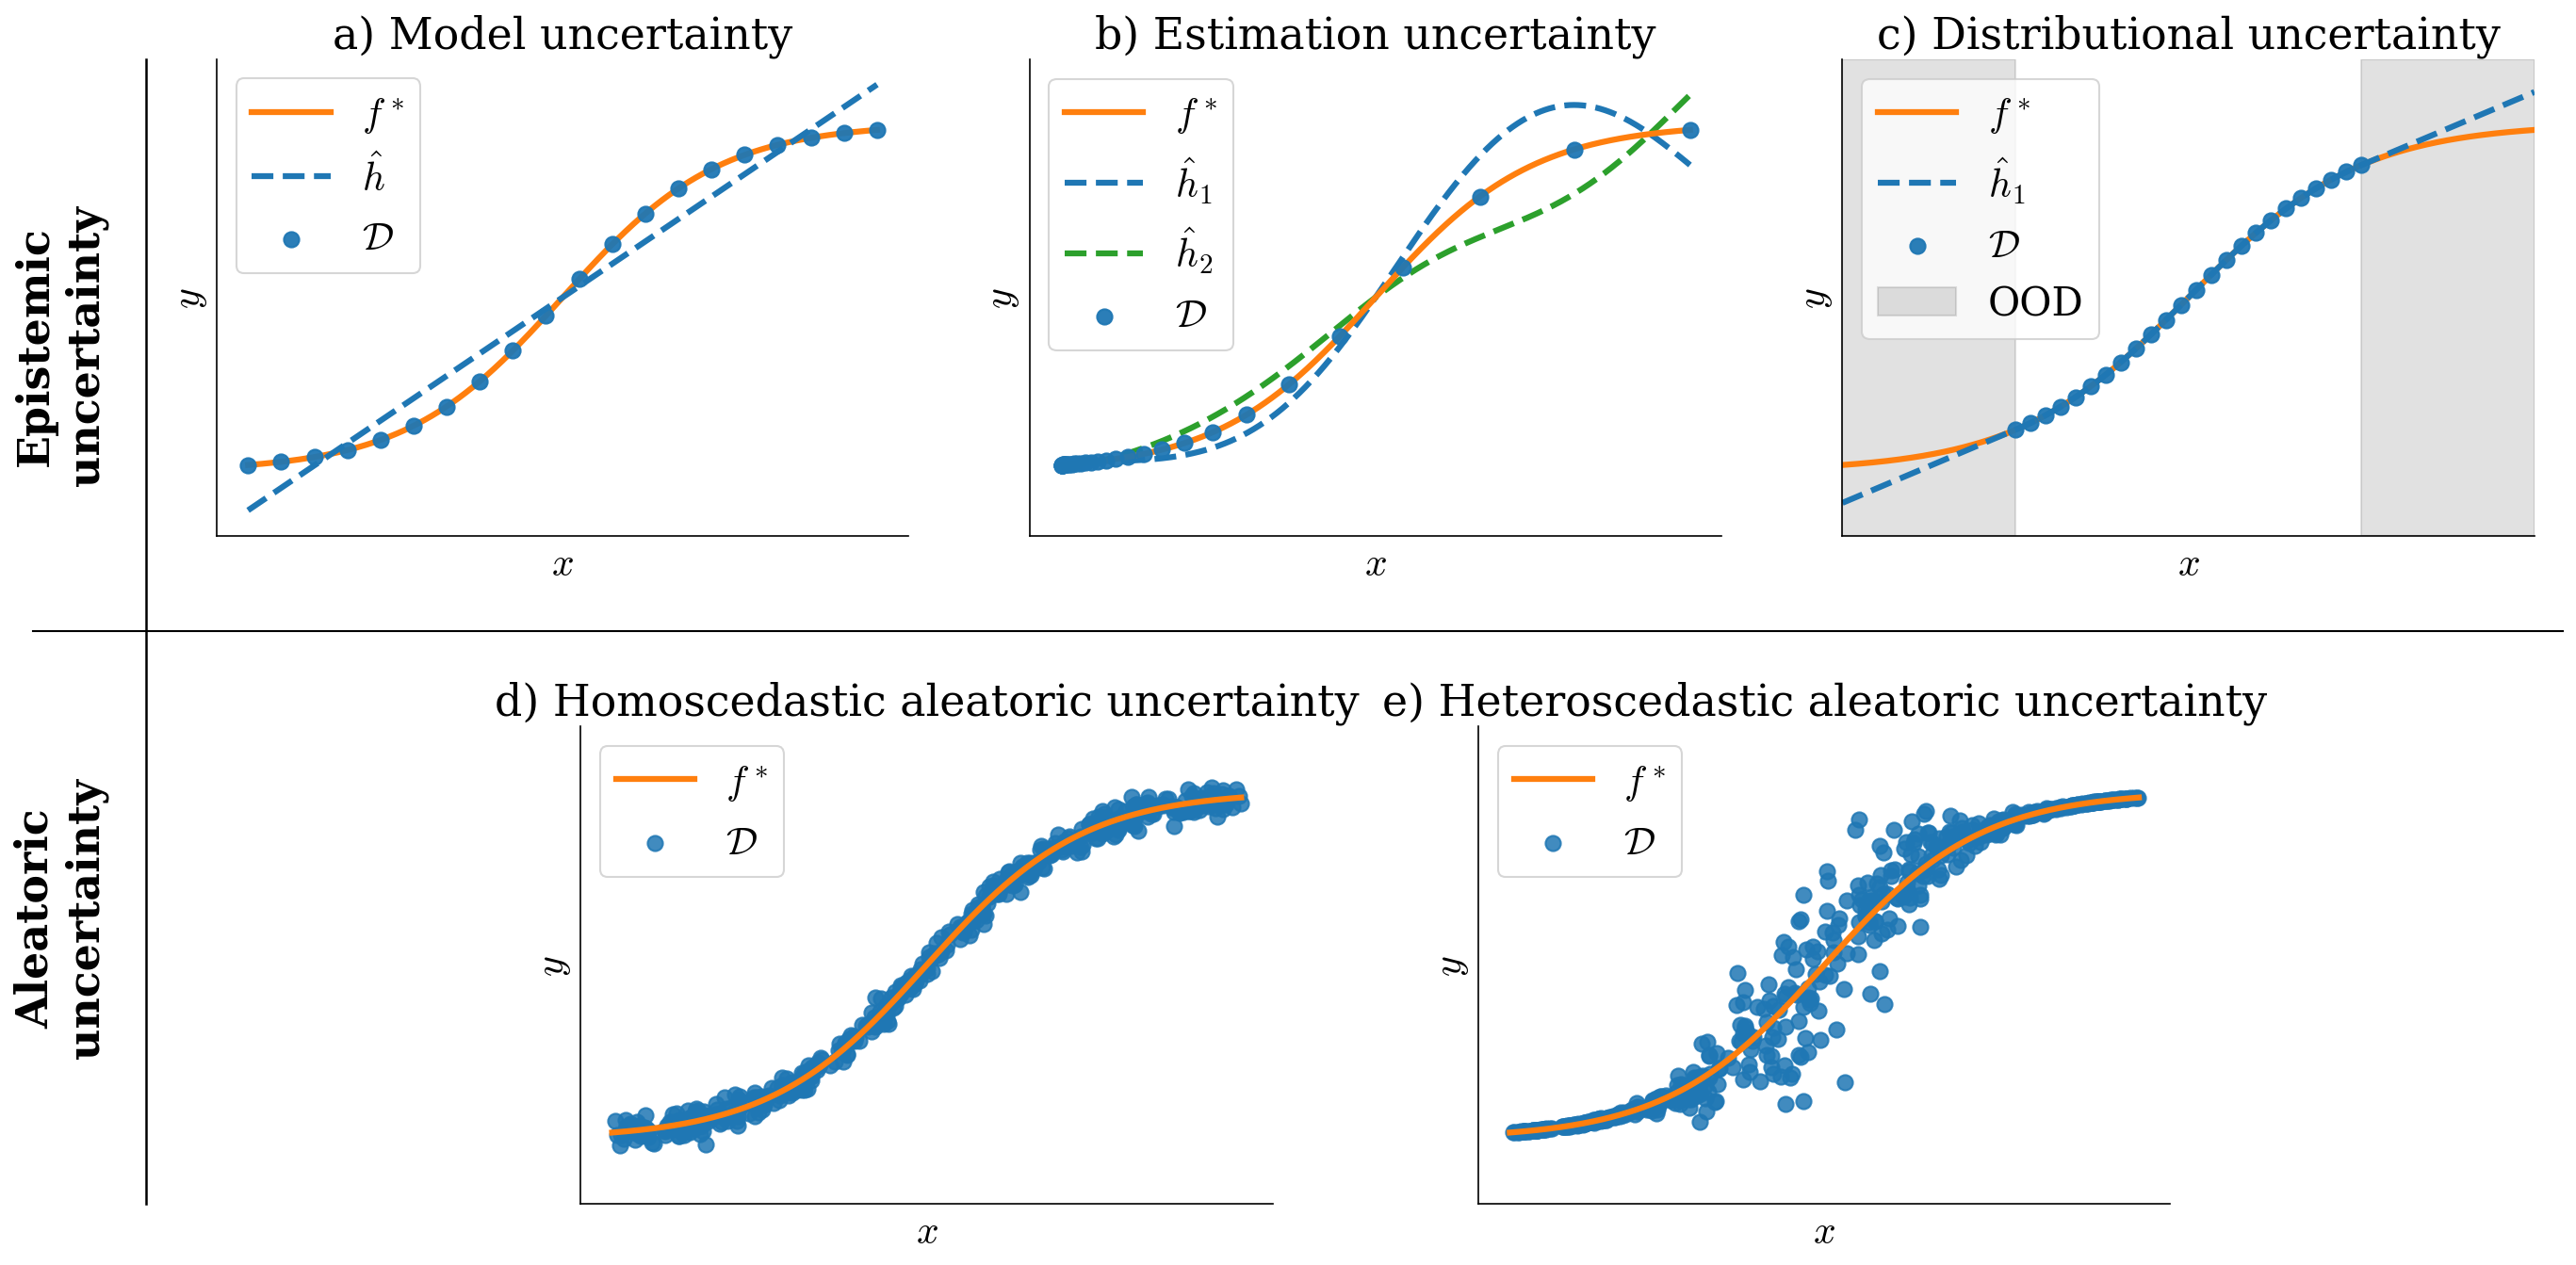

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/sources_uncertainty.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/sources_uncertainty.pdf


In [60]:
f_true = lambda x: expit(x)

# Homoscedastic aleatoric uncertainty
sigma_homo = 0.02

# Heteroscedastic aleatoric uncertainty
A = 0.15
sigma = 1
mu = 0

sigma_hetero = lambda x: A * np.exp(-0.5 * ((x - mu)/sigma)**2)

fig, axs = plot_uncertainty_grid(
    n_points=500,
    seed=42,
    f_true=f_true,
    sigma_homo=sigma_homo,
    sigma_hetero=sigma_hetero,
    x_range=(-4, 4),
    mean_lw=3,
    dashed_lw=3,
    figsize=(20, 10)
)

FigureSaver.save_fig(fig, "sources_uncertainty")

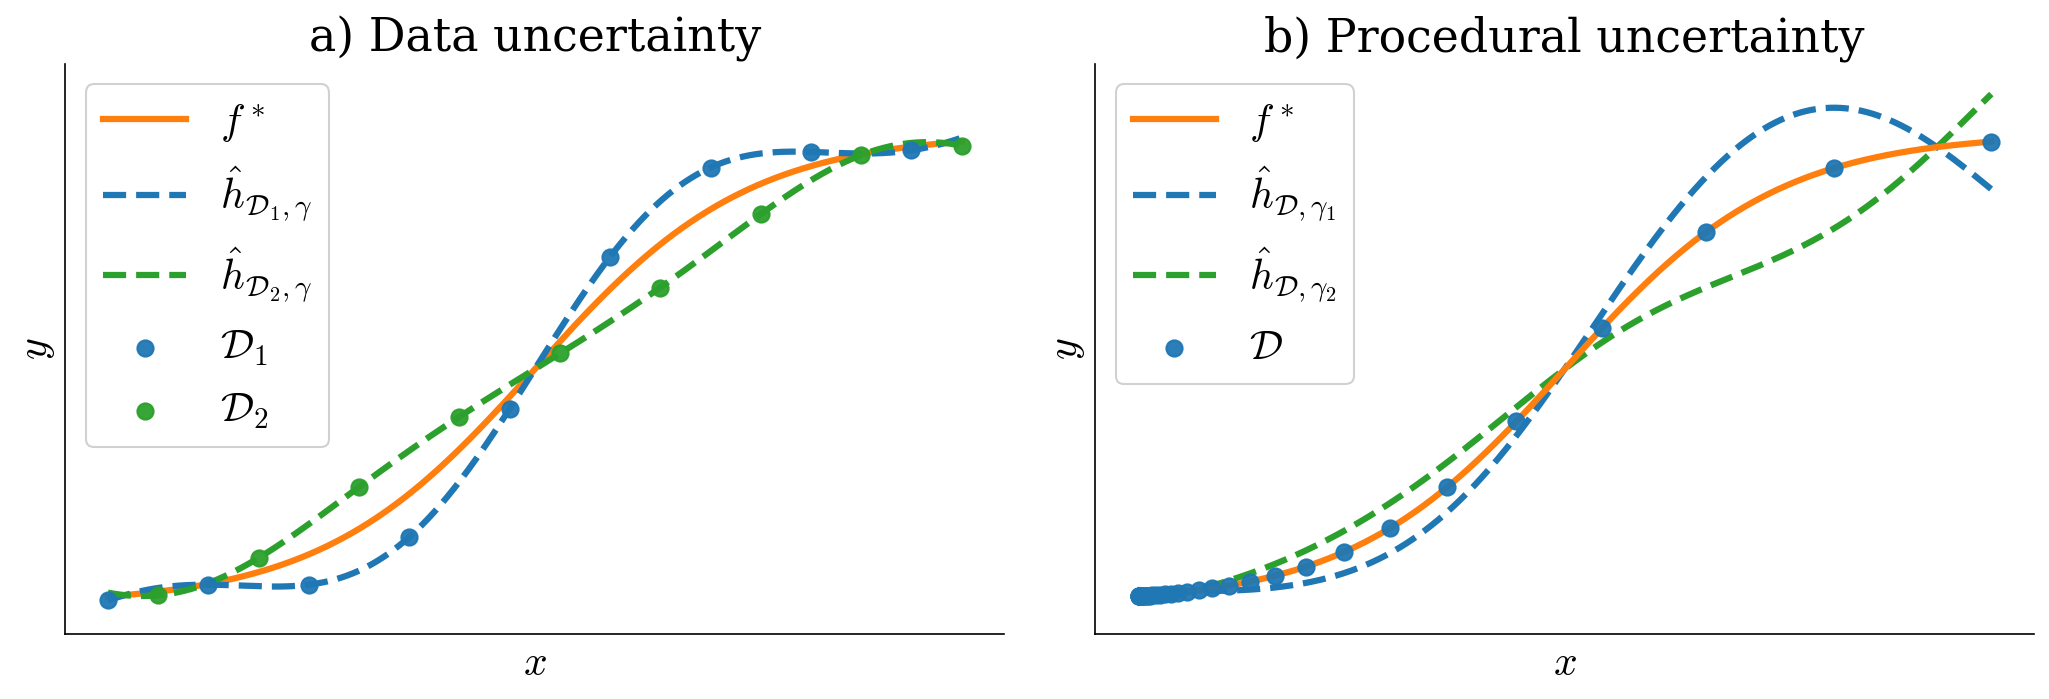

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/data_procedural_uncertainty.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/data_procedural_uncertainty.pdf


In [61]:
def plot_data_and_procedural_uncertainty(
    x_range=(-6.0, 6.0),
    figsize=(14, 5),
    mean_lw: float = 1.5,
    dashed_lw: float = 3.0,
    f_true=None,
):
    """
    Plot a 1×2 grid:

        (a) Data uncertainty
        (b) Procedural uncertainty

    Args:
        x_range (tuple[float, float]):
            Range of x-values for both panels.
        figsize (tuple[float, float]):
            Figure size passed to Matplotlib.
        mean_lw (float):
            Line width of the true function f*.
        dashed_lw (float):
            Line width used for the model curves (dashed lines).
        f_true (callable | None):
            Underlying "true" function f*(x). If None, defaults to x³.

    Returns:
        fig (matplotlib.figure.Figure):
            The Matplotlib figure object.
        axs (np.ndarray[plt.Axes]):
            Array of axes (shape (2,)) for the two subplots.
    """

    lo, hi = float(x_range[0]), float(x_range[1])

    def f_star(X):
        X = np.asarray(X).reshape(-1)
        if f_true is None:
            return X**3
        return np.asarray(f_true(X)).reshape(-1)

    xg = np.linspace(lo, hi, 1200)
    fg = f_star(xg)

    blue   = "tab:blue"
    orange = "tab:orange"
    green  = "tab:green"

    pt_size = max(60, int(mean_lw * 14))

    fig, axs = plt.subplots(1, 2, figsize=figsize, sharex=False)
    ax_data, ax_proc = axs

    def _clean(ax):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    # ---------- (a) Data uncertainty ----------
    ax = ax_data
    n_demo = 18
    xs_all = np.linspace(lo, hi, n_demo)
    ys_all = f_star(xs_all)
    Xa, Xb = xs_all[::2], xs_all[1::2]

    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=1)

    amp_base = 0.12 * (np.max(np.abs(fg)) + 1e-9)
    wiggle = 0.6 * np.sin(1.3 * xg)
    slight_tr = 0.15 * xg
    deviation = amp_base * (wiggle + slight_tr)
    model_a = fg + deviation
    model_b = fg - deviation

    ax.plot(
        xg,
        model_a,
        ls="--",
        lw=dashed_lw,
        color=blue,
        label=r"$\hat{h}_{\mathcal{D}_1,\gamma}$",
        zorder=1,
    )
    ax.plot(
        xg,
        model_b,
        ls="--",
        lw=dashed_lw,
        color=green,
        label=r"$\hat{h}_{\mathcal{D}_2,\gamma}$",
        zorder=1,
    )

    yA_on_line = np.interp(Xa, xg, model_a)
    yB_on_line = np.interp(Xb, xg, model_b)

    ax.scatter(
        Xa,
        yA_on_line,
        s=pt_size,
        color=blue,
        alpha=0.95,
        marker="o",
        label=r"$\mathcal{D}_1$",
        zorder=2,
    )
    ax.scatter(
        Xb,
        yB_on_line,
        s=pt_size,
        color=green,
        alpha=0.95,
        marker="o",
        label=r"$\mathcal{D}_2$",
        zorder=2,
    )

    ax.set_title("a) Data uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    _clean(ax)

    # ---------- (b) Procedural uncertainty ----------
    ax = ax_proc
    ax.plot(xg, fg, color=orange, linewidth=mean_lw, label=r"$f^*$", zorder=2)

    t = (xg - lo) / (hi - lo)
    ampP = 0.08 * (np.max(np.abs(fg)) + 1e-9) * (0.4 + 2.5 * t**1.8)
    model_A = fg + ampP * np.sin(0.9 * xg)
    model_B = fg - ampP * np.sin(0.9 * xg)
    n_points_total = 35
    frac = np.geomspace(1e-3, 1, n_points_total)
    xs_proc = lo + (hi - lo) * frac

    ax.plot(
        xg,
        model_A,
        ls="--",
        lw=dashed_lw,
        color=blue,
        label=r"$\hat{h}_{\mathcal{D},\gamma_1}$",
        zorder=1,
    )
    ax.plot(
        xg,
        model_B,
        ls="--",
        lw=dashed_lw,
        color=green,
        label=r"$\hat{h}_{\mathcal{D},\gamma_2}$",
        zorder=1,
    )
    ax.scatter(
        xs_proc,
        f_star(xs_proc),
        s=pt_size,
        color=blue,
        alpha=0.95,
        label=r"$\mathcal{D}$",
        zorder=3,
    )
    ax.set_title("b) Procedural uncertainty")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.grid(True, ls="--", lw=1.5, alpha=0.5)
    ax.legend(loc="upper left", frameon=True, facecolor="white", framealpha=0.9)
    _clean(ax)

    # ---------- Match y-limits across both panels ----------
    y_collect = [fg, ys_all, model_a, model_b, model_A, model_B, f_star(xs_proc)]
    y_all = np.concatenate(
        [np.ravel(v) for v in y_collect if v is not None and np.size(v) > 0]
    )
    y_min, y_max = np.min(y_all), np.max(y_all)
    pad = 0.06 * (y_max - y_min + 1e-9)
    for a in axs.ravel():
        a.set_ylim(y_min - pad, y_max + pad)

    plt.tight_layout()
    plt.show()
    return fig, axs

fig, axs = plot_data_and_procedural_uncertainty(
    x_range=(-4, 4),
    figsize=(14, 5),
    mean_lw=3,
    dashed_lw=3,
    f_true=f_true,
)

FigureSaver.save_fig(fig, "data_procedural_uncertainty")

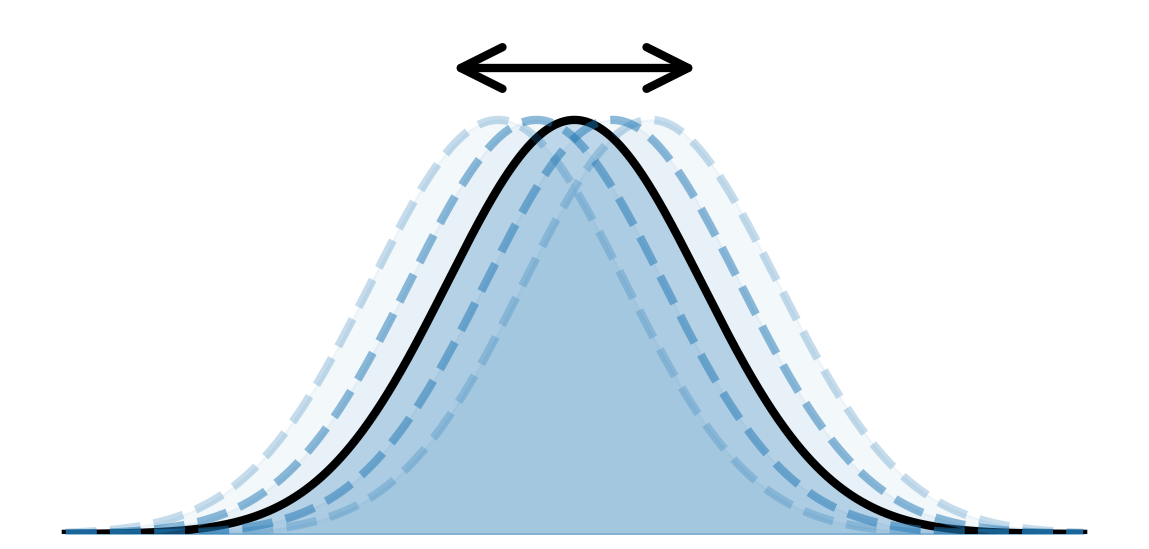

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/mu_y.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/mu_y.pdf


In [13]:
def plot_normal_with_shifts(mu: float = 0, sigma: float = 1,
                            shift_factor: float = 0.3,
                            figsize=(8, 4),
                            lw_factor: float = 2,
                            alpha_base_factor: float = 1,
                            seed: int = 42):
    """
    Plot a normal distribution (N(mu, sigma)) along with several shifted
    variants to visualize distributional variability.

    Features:
        - Central black curve: main distribution N(mu, sigma)
        - Dashed blue curves: shifted versions at ±shift_factor and ±2×shift_factor
        - Semi-transparent fill for all distributions
        - Bidirectional arrow showing ±1σ region

    Args:
        mu (float): Mean of the main normal distribution.
        sigma (float): Standard deviation of the main distribution.
        shift_factor (float): Shift applied to create alternative distributions.
        figsize (tuple[float, float]): Figure size in inches.
        lw_factor (float): Base line width scaling factor.
        alpha_base_factor (float): Global transparency multiplier.
        seed (int): Random seed (for reproducibility placeholder; unused).

    Returns:
        fig (matplotlib.figure.Figure): The created Matplotlib figure.
    """
    np.random.seed(seed)

    # Range for x-values
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, sharex=False, sharey=True)

    # Main distribution
    ax.plot(x, norm.pdf(x, mu, sigma),
            color="black", lw=lw_factor * 2)
    ax.fill_between(x, norm.pdf(x, mu, sigma),
                    color="tab:blue", alpha=0.25 * alpha_base_factor)

    # Shifted distributions (±1, ±2 shift_factor)
    for k, alpha in zip([1, 2], [0.5, 0.25]):
        for sign in [-1, 1]:
            shift_mu = mu + sign * shift_factor * k
            ax.plot(x, norm.pdf(x, shift_mu, sigma),
                    ls="--", lw=lw_factor * 2,
                    color="tab:blue", alpha=alpha * alpha_base_factor)
            ax.fill_between(x, norm.pdf(x, shift_mu, sigma),
                            color="tab:blue", alpha=0.05 * alpha_base_factor)

    # Draw ±σ arrow
    ax.annotate('', xy=(mu - sigma, norm.pdf(mu, mu, sigma) + 0.05),
                xytext=(mu + sigma, norm.pdf(mu, mu, sigma) + 0.05),
                arrowprops=dict(arrowstyle="<->",
                                lw=lw_factor * 2,
                                mutation_scale=50,
                                color="black"))

    # Style adjustments
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(""); ax.set_ylabel("")
    ax.set_ylim(0, 0.5)
    ax.set_frame_on(False)

    plt.tight_layout()
    plt.show()

    return fig

fig = plot_normal_with_shifts()
FigureSaver.save_fig(fig, "mu_y")

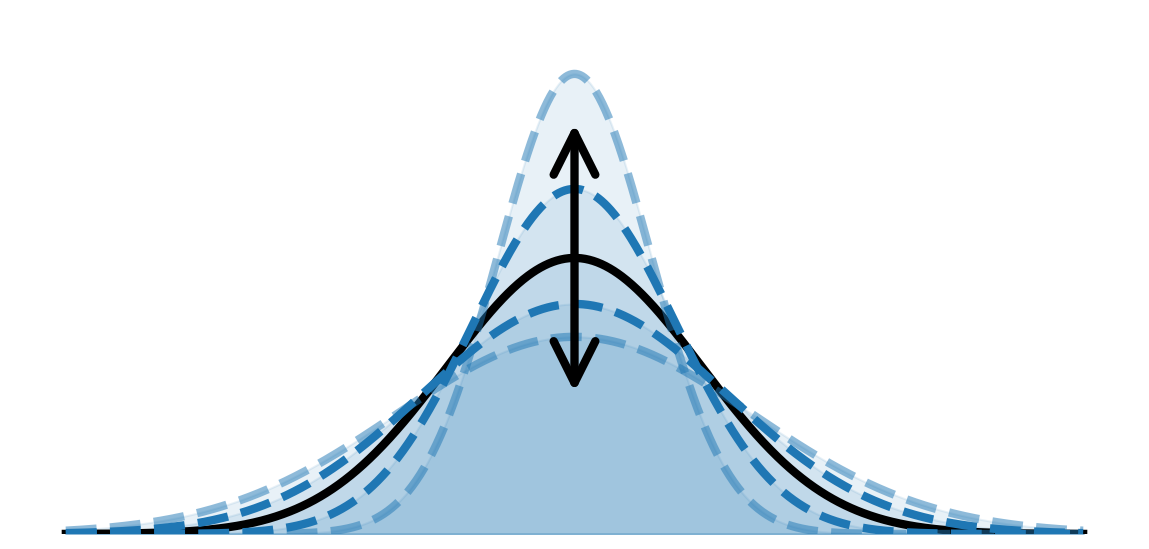

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/sigma_y.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/sigma_y.pdf


In [14]:
def plot_normal_with_sigma_shifts(mu: float = 0, sigma: float = 1,
                                  shift_factor: float = 0.2,
                                  figsize=(8, 4),
                                  lw_factor: float = 2,
                                  alpha_base_factor: float = 2,
                                  fill_alpha: float = 0.05,
                                  seed: int = 42):
    """
    Plot a normal distribution (N(mu, sigma)) along with variants that have
    larger or smaller standard deviations to illustrate variance effects.

    Features:
        - Solid black curve: base distribution N(mu, sigma)
        - Dashed blue curves: wider/narrower variants with σ ± k·shift_factor
        - Semi-transparent fills for visual clarity
        - Bidirectional vertical arrow indicating ±σ

    Args:
        mu (float): Mean of the main normal distribution.
        sigma (float): Standard deviation of the main distribution.
        shift_factor (float): Change applied to sigma for shifted distributions.
        figsize (tuple[float, float]): Figure size in inches.
        lw_factor (float): Base line width scaling.
        alpha_base_factor (float): Global transparency scaling.
        fill_alpha (float): Alpha for filled areas under the curves.
        seed (int): Random seed (for reproducibility placeholder; unused).

    Returns:
        fig (matplotlib.figure.Figure): The created Matplotlib figure.
    """
    np.random.seed(seed)

    # Create range of x-values
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, sharex=False, sharey=True)

    # Base distribution
    ax.plot(x, norm.pdf(x, mu, sigma),
            lw=lw_factor * 2, color='black')
    ax.fill_between(x, norm.pdf(x, mu, sigma),
                    alpha=fill_alpha * alpha_base_factor,
                    color='tab:blue')

    # Shifted distributions for σ ± shift_factor·k
    for k, alpha in zip([1, 2], [0.5, 0.25]):
        for sign in [-1, 1]:
            sigma_shifted = sigma + sign * (shift_factor * k)
            ax.plot(x, norm.pdf(x, mu, sigma_shifted),
                    ls='--', lw=lw_factor * 2,
                    alpha=alpha * alpha_base_factor,
                    color='tab:blue')
            ax.fill_between(x, norm.pdf(x, mu, sigma_shifted),
                            alpha=fill_alpha * alpha_base_factor,
                            color='tab:blue')

    # Draw vertical arrow indicating ±σ range
    ax.annotate('', xy=(mu, norm.pdf(mu, mu, sigma) - 0.2),
                xytext=(mu, norm.pdf(mu, mu, sigma) + 0.2),
                arrowprops=dict(arrowstyle="<->",
                                lw=lw_factor * 2,
                                mutation_scale=50,
                                color='black'))

    # Clean style: no ticks, labels, or frame
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(""); ax.set_ylabel("")
    ax.set_ylim(0, 0.75)
    ax.set_frame_on(False)

    plt.tight_layout()
    plt.show()

    return fig

fig = plot_normal_with_sigma_shifts()
FigureSaver.save_fig(fig, "sigma_y")

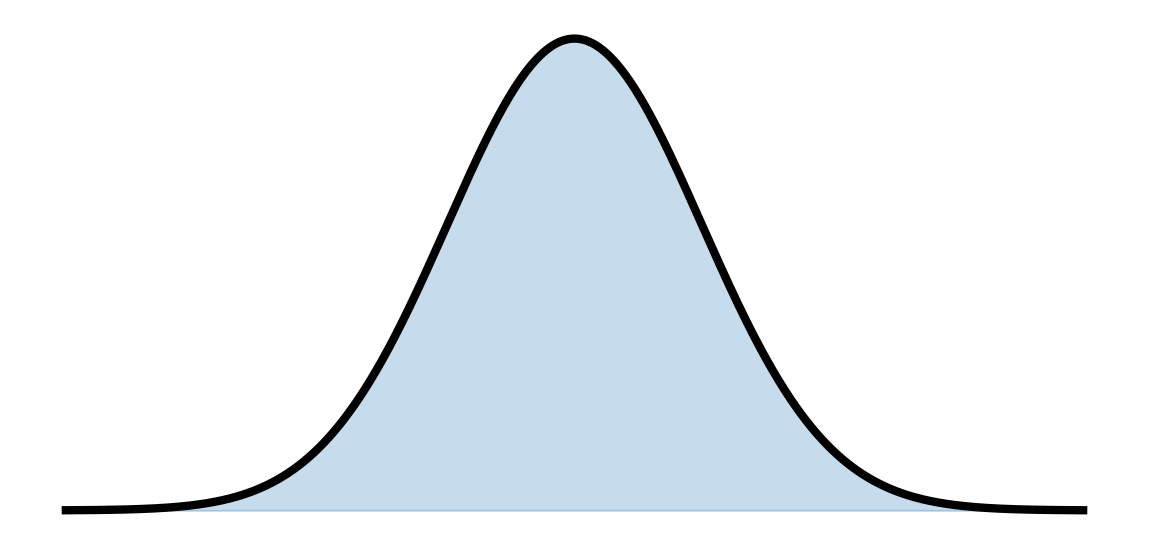

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/gaussian.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/gaussian.pdf


In [15]:
def plot_gaussian(mu: float = 0, sigma: float = 1,
                  figsize=(8, 4), lw_factor: float = 2,
                  alpha_base_factor: float = 1):
    """
    Plots the central Gaussian distribution N(mu, sigma) in the same style
    as the original version (blue fill, black outline).
    """
    # x-axis
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    fig, ax = plt.subplots(figsize=figsize)

    # Main black curve
    ax.plot(x, y, color="black", lw=lw_factor * 2)

    # Blue fill
    ax.fill_between(x, y,
                    color="tab:blue",
                    alpha=0.25 * alpha_base_factor)

    # Same layout as original
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(""); ax.set_ylabel("")
    ax.set_frame_on(False)

    plt.tight_layout()
    plt.show()

    return fig

fig = plot_gaussian()
FigureSaver.save_fig(fig, "gaussian")


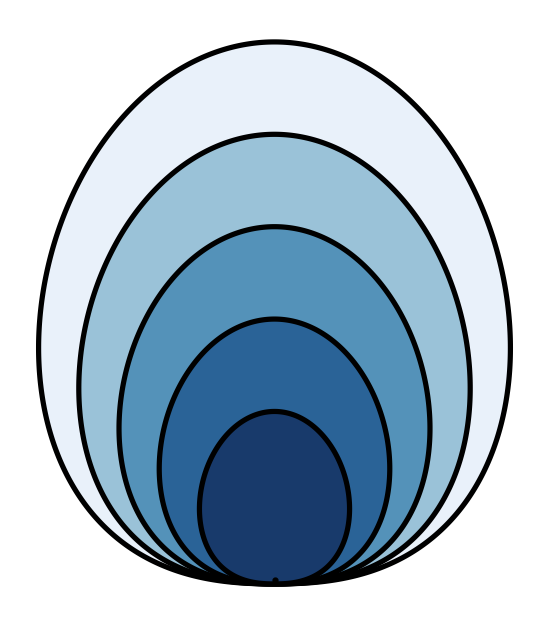

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/nig.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/08_concept_figures/nig.pdf


In [16]:
import matplotlib.pyplot as plt
import numpy as np


def plot_nig_5_layers(figsize=(4, 6)):
    """
    Plot a stylized NIG 'egg-shaped' contour with 5 solid blue color layers.

    Features:
    - 5 predefined blue colors (dark → light)
    - Thick black outlines
    - No transparency
    - Inner shapes drawn last to keep outlines visible

    Parameters
    ----------
    figsize : tuple, optional
        Size of the matplotlib figure (default: (4, 6)).

    Returns
    -------
    fig : matplotlib.figure.Figure
        The generated figure object.
    """

    # Angular parameter for the egg shape
    theta = np.linspace(0, 2 * np.pi, 600)

    # Egg-shaped curve (sharp bottom, round top)
    y_base = (1 - np.cos(theta))**1.2
    x_base = np.sin(theta)

    # Five blue color tones (inner → outer)
    colors = [
        "#183A6B",  # darkest blue (center)
        "#2A6397",
        "#5492B9",
        "#9AC2D8",
        "#E9F1FA"   # lightest blue (outer)
    ]

    n_layers = len(colors)
    scales = np.linspace(0.35, 1.1, n_layers)

    fig, ax = plt.subplots(figsize=figsize)

    # Draw from outer layer → inner layer
    for s, c in reversed(list(zip(scales, colors))):
        x = s * x_base
        y = s * y_base
        ax.fill(
            x, y,
            facecolor=c,
            edgecolor="black",
            linewidth=2.5
        )

    # Optional center point
    ax.plot(0, scales[0] * y_base.min() + 0.02, "k.", markersize=4)

    # Clean layout
    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()
    plt.show()

    return fig


# Example usage:
fig = plot_nig_5_layers()
FigureSaver.save_fig(fig, "nig")